<a href="https://colab.research.google.com/github/TatyanaFilimonova/CM/blob/main/Module4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Regression Metrics

## Середньоквадратична помилка (MSE)

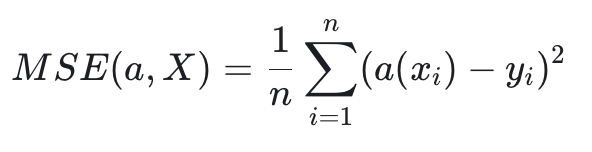

In [ ]:
def mse(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

# Приклад використання
y_true = np.array([1, 2, 3, 4, 5])
y_pred = np.array([1.1, 1.9, 3.2, 3.8, 100])

print(f"MSE: {mse(y_true, y_pred)}")

MSE: 1805.02


In [ ]:
from sklearn.metrics import mean_squared_error


mean_squared_error(y_true, y_pred)

1805.02

**Переваги:**
- Легко обчислюється та інтерпретується.
- Чутлива до великих помилок (штрафує їх сильніше).

**Недоліки:**
- Чутлива до викидів (outliers).

**Коли доречно використовувати:**
- Коли важливо мінімізувати великі помилки.
- Коли дані не містять багато викидів.

## Середня абсолютна помилка (MAE)

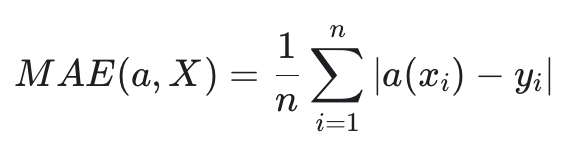

In [ ]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

y_true = np.array([1, 2, 3, 4, 5])
y_pred = np.array([1.1, 1.9, 3.2, 3.8, 10.1])

# Приклад використання
print(f"MAE: {mae(y_true, y_pred)}")

MAE: 1.1400000000000001


In [ ]:
from sklearn.metrics import mean_absolute_error


mean_absolute_error(y_true, y_pred)

1.1400000000000001

**Переваги:**
- Менш чутлива до викидів, ніж MSE.
- Легко інтерпретується.

**Недоліки:**
- Менш чутлива до великих помилок, ніж MSE.

## Коефіцієнт детермінації

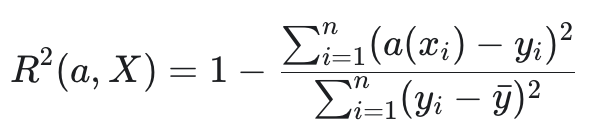

In [ ]:
def r_squared(y_true, y_pred):
    return 1 - np.sum(np.square(y_pred - y_true)) / np.sum(np.square(y_true - np.mean(y_true)))

y_true = np.array([1, 2, 3, 4, 5])
y_pred = np.array([1.1, 1.9, 3.2, 3.8, 5.3])

# Приклад використання
print(f"R-квадрат: {r_squared(y_true, y_pred)}")

R-квадрат: 0.981


In [ ]:
from sklearn.metrics import r2_score

# Приклад використання
print(f"R-квадрат: {r2_score(y_true, y_pred)}")

R-квадрат: 0.981


**Інтерпретація значень:**
- R^2 = 1: ідеальна модель, що пояснює 100% дисперсії даних.
- R^2 = 0: модель не краща за константну модель (середнє значення).
- R^2 < 0: модель гірша за константну модель.

**Коли використовувати:**
- Коли важливо оцінити, наскільки добре модель пояснює дисперсію даних.

# Classification Metrics

Особливості задач класифікації.

На відміну від регресії, де ми прогнозуємо число, в задачах класифікації ми прогнозуємо клас (категорію).

**Приклад:** розпізнавання рукописних цифр - класифікація, прогнозування температури - регресія.

## Train logistic regression with polinomial features

In [ ]:
np.random.seed(27)

eng_result = np.random.randint(1, 101, size=100).reshape(-1, 1)
main_result = np.random.randint(1, 101, size=100).reshape(-1, 1)
budget_student = np.array(eng_result + main_result >= 100, dtype=int).reshape(-1, 1)

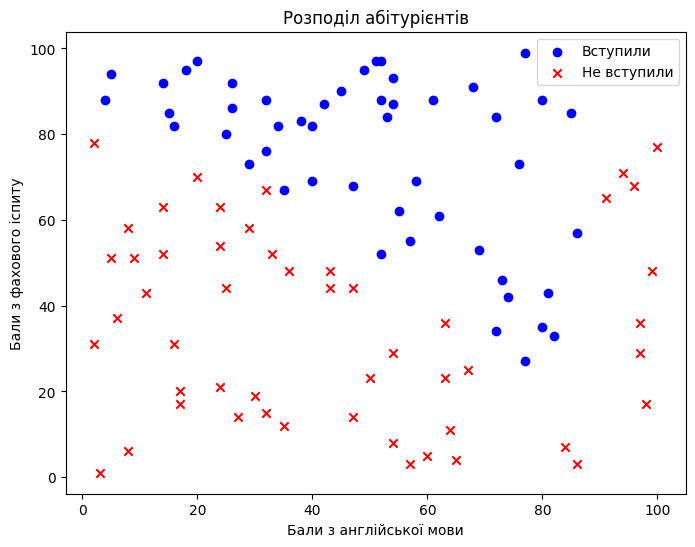

In [ ]:
# Дані абітурієнтів
condition = np.logical_or(eng_result + main_result >= 100, main_result >= 80)
condition = np.logical_and(condition, eng_result < 90)
new_budget_student = np.array(condition, dtype=int).reshape(-1, 1)
new_data = np.hstack((eng_result, main_result, new_budget_student))

X = new_data[:, :2]  # Ознаки (бали з іспитів)
y = new_data[:, 2]  # Цільова змінна (вступ на бюджет: 1 - так, 0 - ні)

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Вступили", marker='o', c='blue')
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Не вступили", marker='x', c='red')

plt.xlabel("Бали з англійської мови")
plt.ylabel("Бали з фахового іспиту")
plt.title("Розподіл абітурієнтів")
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
norm_X = scaler.fit_transform(X)

### Initialize

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


poly_features = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly_features.fit_transform(norm_X)

# check the extened polynomial features of the first data point
print('Original feature:', norm_X[0])
print('Polynomial features', X_poly[0])

Original feature: [-0.97420077  0.52328502]
Polynomial features [-0.97420077  0.52328502  0.94906714 -0.50978467  0.27382722]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

### Fit

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.intercept_, log_reg.coef_ # check the bais term and feature weights of the trained model

(array([1.0693183]),
 array([[ 1.13560457,  2.51388514, -1.22833746, -1.25720732, -0.15779622]]))

#### Test

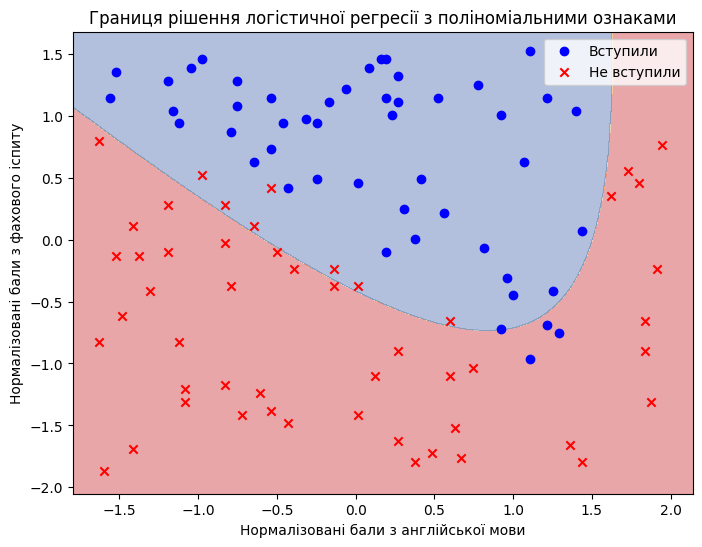

In [ ]:
# cітка точок для візуалізації
discretization = 1000
grid_x = np.linspace(np.min(norm_X[:, 0])*1.1, np.max(norm_X[:, 0])*1.1, discretization)
grid_y = np.linspace(np.min(norm_X[:, 1])*1.1, np.max(norm_X[:, 1])*1.1, discretization)
xx, yy = np.meshgrid(grid_x, grid_y)

# передбачення значень для кожної точки сітки
grid = np.c_[xx.ravel(), yy.ravel()]
grid_poly = poly_features.transform(grid)
Z = log_reg.predict(grid_poly).reshape(xx.shape)

# візуалізація
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.4)
plt.scatter(norm_X[y == 1, 0], norm_X[y == 1, 1], label="Вступили", marker='o', c='blue')
plt.scatter(norm_X[y == 0, 0], norm_X[y == 0, 1], label="Не вступили", marker='x', c='red')

plt.xlabel("Нормалізовані бали з англійської мови")
plt.ylabel("Нормалізовані бали з фахового іспиту")
plt.title("Границя рішення логістичної регресії з поліноміальними ознаками")
plt.legend()
plt.show()

## Частка правильних відповідей

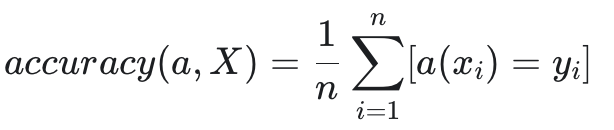

In [ ]:
y_test_pred = log_reg.predict(X_test)

In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [ ]:
y_train_pred = log_reg.predict(X_train)
accuracy(y_train, y_train_pred)

0.95

In [ ]:
accuracy(y_test, y_test_pred)

0.7

In [ ]:
log_reg.score(X_test, y_test)

0.7

## Confusion Matrix

**Матриця помилок** - це таблиця, що показує кількість правильно та неправильно класифікованих об'єктів.

Вона складається з чотирьох елементів:
- **True Positive (TP)**: кількість об'єктів позитивного класу, класифікованих вірно.
- **False Positive (FP)**: кількість об'єктів негативного класу, класифікованих помилково як позитивні.
- **True Negative (TN)**: кількість об'єктів негативного класу, класифікованих вірно.
- **False Negative (FN)**: кількість об'єктів позитивного класу, класифікованих помилково як негативні.

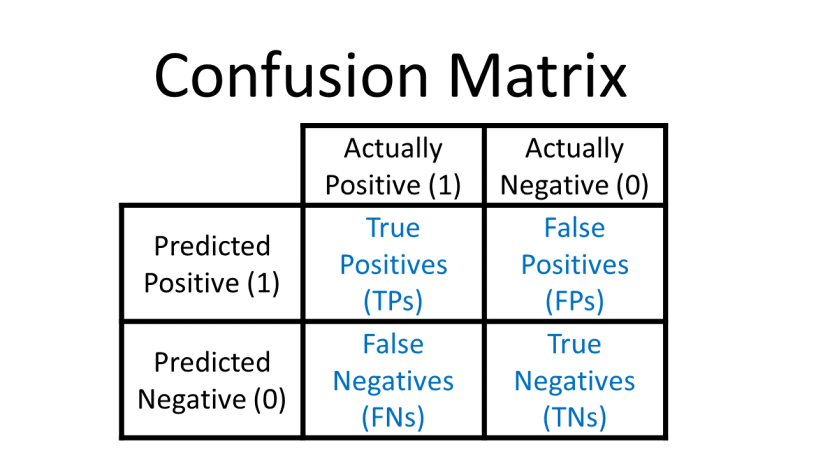

In [ ]:
y_pred = log_reg.predict(X_poly)

In [ ]:
actually_positive = (y == 1)
predicted_for_positive = y_pred[actually_positive]

In [ ]:
sum(actually_positive)

49

In [ ]:
true_positive = np.sum(predicted_for_positive == 1)
true_positive

46

In [ ]:
false_positive = np.sum(predicted_for_positive == 0)
false_positive

3

In [ ]:
actually_negative = (y == 0)
predicted_for_negative = y_pred[actually_negative]

In [ ]:
true_negative = np.sum(predicted_for_negative == 0)
true_negative

44

In [ ]:
false_negative = np.sum(predicted_for_negative == 1)
false_negative

7

### Accuracy notation by confusion matrix

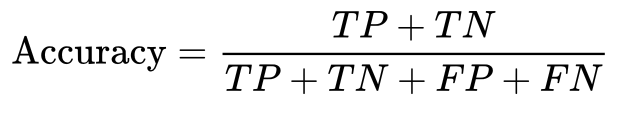

In [ ]:
(true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

0.9

In [ ]:
log_reg.score(X_poly, y)

0.9

## Точність та повнота

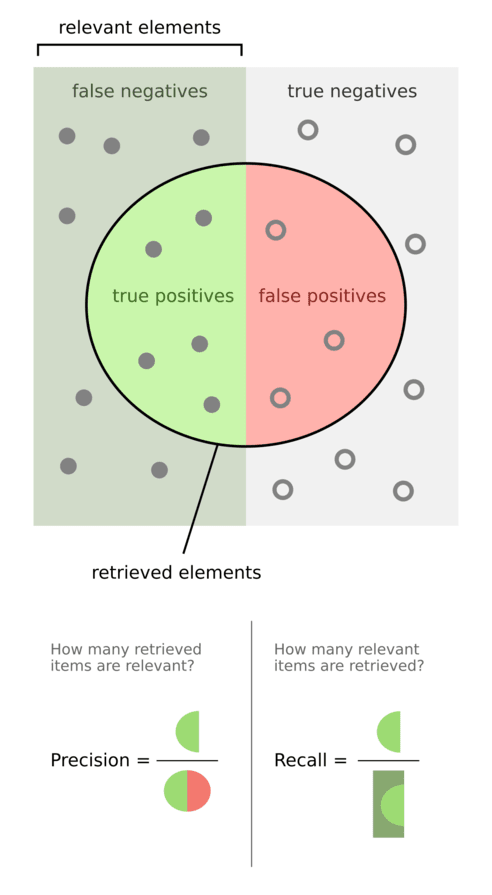

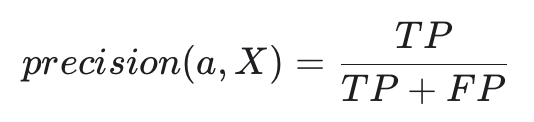

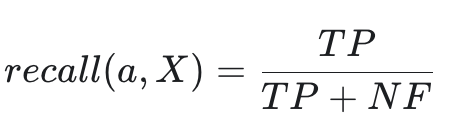

In [ ]:
precision = true_positive / (true_positive + false_positive)
precision

0.9387755102040817

In [ ]:
recall = true_positive / (true_positive + false_negative)
recall

0.8679245283018868

**Precision (точність):**
- Показує, яка частка об'єктів, класифікованих як позитивні, є справді позитивними.
- Важлива, коли ціна помилково позитивної класифікації висока.

**Recall (повнота):**
- Показує, яка частка об'єктів позитивного класу була правильно класифікована.
- Важлива, коли важливо виявити якомога більше об'єктів позитивного класу.

Приклади задач, де важлива та чи інша метрика:

**Високий precision:**
- Медична діагностика (важливо мінімізувати кількість хибних позитивних діагнозів).
- Спам-фільтр (важливо, щоб листи, що потрапляють до папки "Спам", дійсно були спамом).

**Високий recall:**
- Виявлення шахрайства (важливо виявити якомога більше випадків шахрайства, навіть якщо це призведе до деякої кількості хибних спрацьовувань).
- Пошукові системи (важливо, щоб користувач отримав якомога більше результатів пошуку).

## Об'єднання точності та повноти

### Average

In [ ]:
import plotly.graph_objects as go

In [ ]:
axis_values = np.linspace(0, 1, 100)
_x, _y = np.meshgrid(axis_values, axis_values)

In [ ]:
fig = go.Figure(data=[go.Surface(x=_x, y=_y, z=(_x + _y) / 2)])
fig.update_layout(
    title='Average', autosize=False,
    width=800, height=800,
    scene=dict(
        xaxis_title='Precision',
        yaxis_title='Recall',
        zaxis_title='Average',
    ),
)
fig.show()

### Minimum

In [ ]:
fig = go.Figure(data=[go.Surface(x=_x, y=_y, z=np.minimum(_x, _y))])
fig.update_layout(
    title='Minimum', autosize=False,
    width=800, height=800,
    scene=dict(
        xaxis_title='Precision',
        yaxis_title='Recall',
        zaxis_title='Minimum',
    ),
)
fig.show()

### F1-score

In [ ]:
def my_f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall)

In [ ]:
fig = go.Figure(data=[go.Surface(x=_x, y=_y, z=my_f1_score(_x, _y))])
fig.update_layout(
    title='F1-Score', autosize=False,
    width=800, height=800,
    scene=dict(
        xaxis_title='Precision',
        yaxis_title='Recall',
        zaxis_title='F1-Score',
    ),
)
fig.show()

<ipython-input-36-c6c313c2bf15>:2: RuntimeWarning:

invalid value encountered in divide



In [ ]:
from sklearn.metrics import f1_score

# Обчислення F1-score
f1 = f1_score(y, y_pred)

print("F1-score:", f1)

F1-score: 0.9019607843137256


Usefull information:
- [Why harmonic mean](https://stackoverflow.com/questions/26355942/why-is-the-f-measure-a-harmonic-mean-and-not-an-arithmetic-mean-of-the-precision).
- [Geometrical interpretation](https://www.geogebra.org/m/ja38xzja).

# Якість оцінок приналежності класу

## PR-крива

**Принцип побудови:**
- PR-крива будується в координатах (Recall, Precision).
- Кожна точка на кривій відповідає певному значенню порога класифікатора.
- Змінюючи поріг, ми змінюємо баланс між точністю та повнотою.

In [ ]:
y_pred_proba = log_reg.predict_proba(X_poly)[:, 1]
y_pred_proba >= 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
# area under curve AUC

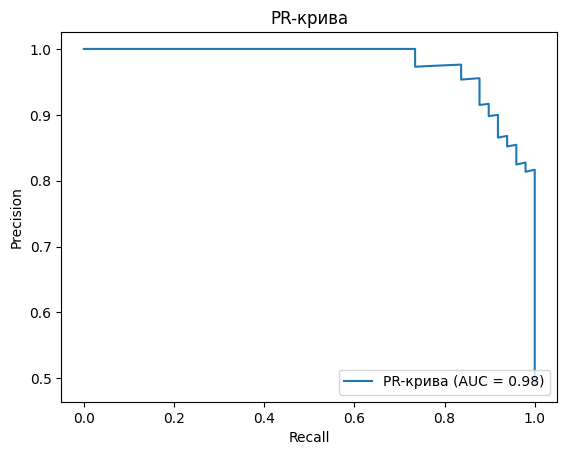

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# передбачаємо ймовірності класів
y_pred_proba = log_reg.predict_proba(X_poly)[:, 1]

# обчислюємо precision, recall та thresholds
precision, recall, thresholds = precision_recall_curve(y, y_pred_proba)

# обчислюємо площу під PR-кривою
pr_auc = auc(recall, precision)

# будуємо PR-криву
plt.figure()
plt.plot(recall, precision, label='PR-крива (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-крива')
plt.legend(loc="lower right")
plt.show()

In [ ]:
thresholds

array([2.64243963e-06, 2.26790731e-05, 3.57921652e-04, 9.50712496e-04,
       1.48090989e-03, 2.23691436e-03, 3.94529259e-03, 6.06775228e-03,
       6.09581184e-03, 1.00307546e-02, 1.08627854e-02, 1.22100142e-02,
       1.43519017e-02, 1.62630606e-02, 3.25549371e-02, 5.47998786e-02,
       5.90640839e-02, 6.52170426e-02, 7.41754100e-02, 8.04045627e-02,
       8.15004349e-02, 1.03892423e-01, 1.25329557e-01, 1.57490117e-01,
       1.66050840e-01, 1.66904133e-01, 1.68500940e-01, 1.93979363e-01,
       1.94237948e-01, 2.13724505e-01, 2.16963095e-01, 2.32486112e-01,
       2.85046481e-01, 3.03926704e-01, 3.05384229e-01, 3.11645556e-01,
       3.11868406e-01, 3.61772594e-01, 3.77035892e-01, 3.77988497e-01,
       3.99190960e-01, 4.29454157e-01, 4.31333581e-01, 4.58962429e-01,
       4.65699960e-01, 4.70031495e-01, 4.70357512e-01, 5.02511269e-01,
       5.22405395e-01, 5.29857987e-01, 5.37358125e-01, 5.45335606e-01,
       5.53946827e-01, 5.61524780e-01, 5.67876835e-01, 5.95400122e-01,
      

**Інтерпретація графіка:**
- Чим ближче крива до верхнього правого кута, тим краще модель.
- Ідеальна модель має PR-криву, що проходить через точку (1, 1).

**AUC-PRC як метрика якості.**

AUC-PRC - це площа під PR-кривою.
Чим більша площа, тим краще модель.

## ROC-крива

**Принцип побудови:**
- ROC-крива будується в координатах (False Positive Rate, True Positive Rate).
- False Positive Rate (FPR) = *FP / (FP + TN)*. Частка 0 помилково класифікованих як 1.
- True Positive Rate (TPR) = *TP / (TP + FN)* or *Recall*. Частка 1 правильно класифікованих як 1.
- Кожна точка на кривій відповідає певному значенню порога класифікатора.

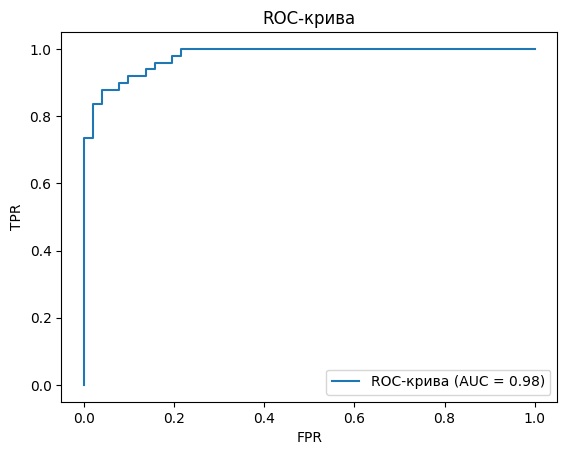

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# передбачаємо ймовірності класів
y_pred_proba = log_reg.predict_proba(X_poly)[:, 1]

# обчислюємо precision, recall та thresholds
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

# обчислюємо площу під PR-кривою
roc_auc = auc(fpr, tpr)

# будуємо PR-криву
plt.figure()
plt.plot(fpr, tpr, label='ROC-крива (AUC = %0.2f)' % roc_auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

**Інтерпретація графіка:**
- Чим ближче крива до верхнього лівого кута, тим краще модель.
- Ідеальна модель має ROC-криву, що проходить через точки (0, 1) та (1, 1).

**Порівняння AUC-ROC та AUC-PRC**:


**AUC-ROC:**
- краще використовувати, коли класи збалансовані або коли нас більше цікавить саме позитивний клас.
- більш чутлива до дисбалансу класів, ніж AUC-ROC.

**AUC-PRC:**
- може бути оманливо високою при дисбалансі класів, особливо якщо нас цікавить саме менший клас.
- менш чутлива до дисбалансу класів, ніж AUC-PRC.